In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


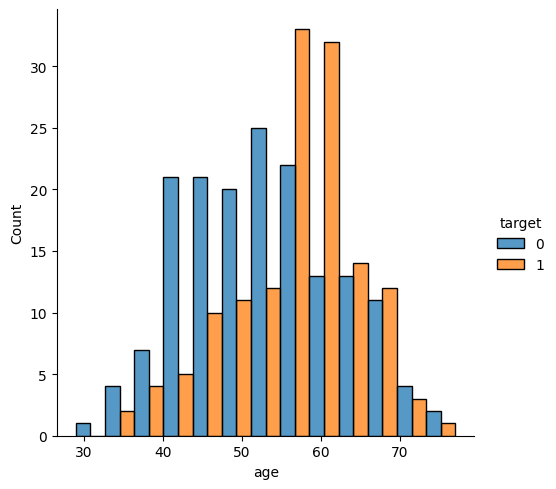

In [ ]:
sns.displot(df['target'], x=df['age'], hue=df['target'], multiple="dodge")

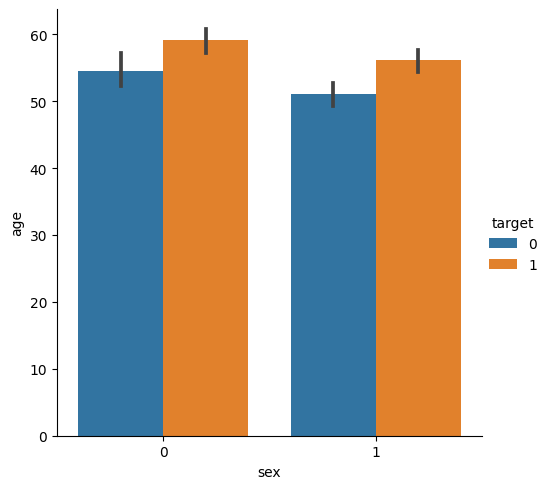

In [ ]:
g = sns.catplot(
    data=df, kind="bar",
    x='sex', y='age', hue='target',
)
g.set_axis_labels("sex", "age")
g.set_titles("Distribution of age vs sex with the target class")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn_classifier.fit(X_train, y_train)

y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [ ]:
# Bai tap 4
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM_classifier = SVC(kernel = 'rbf', random_state=42)
SVM_classifier.fit(X_train , y_train)

y_train_pred = SVM_classifier.predict(X_train)
y_test_pred = SVM_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for SVMClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.66
Accuracy for test set for KNeighborsClassifier = 0.67


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train , y_train)

y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.85
Accuracy for test set for KNeighborsClassifier = 0.84


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt_classifier.fit(X_train , y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KNeighborsClassifier = 0.75


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf_classifier.fit(X_train , y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.98
Accuracy for test set for KNeighborsClassifier = 0.8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import AdaBoostClassifier

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
adaboost_classifier.fit(X_train , y_train)

y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.91
Accuracy for test set for KNeighborsClassifier = 0.84


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gradient_boosting_classifier = GradientBoostingClassifier(
    learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42
)

gradient_boosting_classifier.fit(X_train , y_train)

y_train_pred = gradient_boosting_classifier.predict(X_train)
y_test_pred = gradient_boosting_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KNeighborsClassifier = 0.85


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier


X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(
    objective="binary:logistic", random_state=42, n_estimators=100
)

xgb_classifier.fit(X_train , y_train)

y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KNeighborsClassifier = 0.84


In [ ]:
from sklearn.ensemble import StackingClassifier
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(kernel='rbf', random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=XGBClassifier()  # You can change the final estimator as needed
)
stacking_classifier.fit(X_train, y_train)


y_train_pred = stacking_classifier.predict(X_train)
y_test_pred = stacking_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
print()
accuracy_for_train = np.round((cm_train [0][0] + cm_train [1][1])/len(y_train) ,2)
accuracy_for_test = np.round ((cm_test [0][0] + cm_test [1][1])/len(y_test) ,2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.92
Accuracy for test set for KNeighborsClassifier = 0.9
